In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

# Exercise 1: Linear Regression
Make up your own personal dataset and predict the regression curve.  
Be a little creative here. Find your own data!  
  
Used dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [2]:
df = pd.read_csv('Life Expectancy Data.csv', sep=',', names=['Life expectancy', 'Alcohol', 'Population', 'HIV/AIDS'])
df.columns

Index(['Life expectancy', 'Alcohol', 'Population', 'HIV/AIDS'], dtype='object')

## Clean data

In [3]:
df = df[pd.to_numeric(df['Life expectancy'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Alcohol'], errors='coerce').notnull()]
df = df.dropna()
df

Life expectancy  \
Afghanistan 2015 Developing 65   263 62 0.01 71.27962362 65 1154 19.1 83 6  8.16 65 0.1  584.25921   33736494            17.2   
            2014 Developing 59.9 271 64 0.01 73.52358168 62 492  18.6 86 58 8.18 62 0.1  612.696514  327582              17.5   
            2013 Developing 59.9 268 66 0.01 73.21924272 64 430  18.1 89 62 8.13 64 0.1  631.744976  31731688            17.7   
            2012 Developing 59.5 272 69 0.01 78.1842153  67 2787 17.6 93 67 8.52 67 0.1  669.959     3696958             17.9   
            2011 Developing 59.2 275 71 0.01 7.097108703 68 3013 17.2 97 68 7.87 68 0.1  63.537231   2978599             18.2   
...                                                                                                                       ...   
Zimbabwe    2004 Developing 44.3 723 27 4.36 0           68 31   27.1 42 67 7.13 65 33.6 454.366654  12777511             9.4   
            2003 Developing 44.5 715 26 4.06 0           7  998  26.7 41 7  6.52 68 36.7 453.3511552 12633897             9.8   
            2002 Developing 44.8 73  25 4.43 0           73 304  26.3 40 73 6.53 71 39.8 57.34834    125525               1.2   
            2001 Developing 45.3 686 25 1.72 0           76 529  25.9 39 76 6.16 75 42.1 548.587312  12366165             1.6   
            2000 Developing 46   665 24 1.68 0           79 1483 25.5 39 78 7.1  78 43.5 547.3588785 12222251              11   

                                                                                                              Alcohol  \
Afghanistan 2015 Developing 65   263 62 0.01 71.27962362 65 1154 19.1 83 6  8.16 65 0.1  584.25921   33736494    17.3   
            2014 Developing 59.9 271 64 0.01 73.52358168 62 492  18.6 86 58 8.18 62 0.1  612.696514  327582      17.5   
            2013 Developing 59.9 268 66 0.01 73.21924272 64 430  18.1 89 62 8.13 64 0.1  631.744976  31731688    17.7   
            2012 Developing 59.5 272 69 0.01 78.1842153  67 2787 17.6 93 67 8.52 67 0.1  669.959     3696958       18   
            2011 Developing 59.2 275 71 0.01 7.097108703 68 3013 17.2 97 68 7.87 68 0.1  63.537231   2978599     18.2   
...                                                                                                               ...   
Zimbabwe    2004 Developing 44.3 723 27 4.36 0           68 31   27.1 42 67 7.13 65 33.6 454.366654  12777511     9.4   
            2003 Developing 44.5 715 26 4.06 0           7  998  26.7 41 7  6.52 68 36.7 453.3511552 12633897     9.9   
            2002 Developing 44.8 73  25 4.43 0           73 304  26.3 40 73 6.53 71 39.8 57.34834    125525       1.3   
            2001 Developing 45.3 686 25 1.72 0           76 529  25.9 39 76 6.16 75 42.1 548.587312  12366165     1.7   
            2000 Developing 46   665 24 1.68 0           79 1483 25.5 39 78 7.1  78 43.5 547.3588785 12222251    11.2   

                                                                                                              Population  \
Afghanistan 2015 Developing 65   263 62 0.01 71.27962362 65 1154 19.1 83 6  8.16 65 0.1  584.25921   33736494      0.479   
            2014 Developing 59.9 271 64 0.01 73.52358168 62 492  18.6 86 58 8.18 62 0.1  612.696514  327582        0.476   
            2013 Developing 59.9 268 66 0.01 73.21924272 64 430  18.1 89 62 8.13 64 0.1  631.744976  31731688       0.47   
            2012 Developing 59.5 272 69 0.01 78.1842153  67 2787 17.6 93 67 8.52 67 0.1  669.959     3696958       0.463   
            2011 Developing 59.2 275 71 0.01 7.097108703 68 3013 17.2 97 68 7.87 68 0.1  63.537231   2978599       0.454   
...                                                                                                                  ...   
Zimbabwe    2004 Developing 44.3 723 27 4.36 0           68 31   27.1 42 67 7.13 65 33.6 454.366654  12777511      0.407   
            2003 Developing 44.5 715 26 4.06 0           7  998  26.7 41 7  6.52 68 36.7 453.3511552 12633897      0

In [4]:
X_Alcohol = df.loc[:, 'Alcohol']
y = df.loc[:, 'Life expectancy']

In [5]:
X_Alcohol_train = X_Alcohol[:-20]
X_Alcohol_test = X_Alcohol[-20:]

y_train = y[:-20]
y_test = y[-20:]

In [6]:
regression = LinearRegression()
regression.fit(np.array(X_Alcohol_train).reshape(-1, 1), y_train)

LinearRegression()

## Predict Life expectancy by Alcohol level

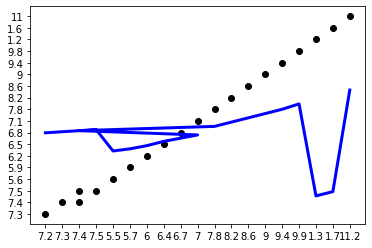

In [7]:
y_predict = regression.predict(np.array(X_Alcohol_test).reshape(-1, 1))
plt.scatter(X_Alcohol_test, y_test, color="black")
plt.plot(X_Alcohol_test, y_predict, color="blue", linewidth=3)

plt.show()

It seems, there is no real connection between alcohol and the life expectancy

# Exercise 2: Logistic Regression
You are walking in the forest and see an iris and measure:  
4.8,2.5,5.3,2.4  
Is this an Iris Virginica or not?  

The absolute minimum is to derive 4 probabilities for each feature.  
But it would be best to evaluate all 4 values in a (combined) equation to get one single probability for Iris Virginica!

In [8]:
iris = datasets.load_iris()
test = np.array([4.8,2.5,5.3,2.4])

## Predict with first feature

In [9]:
X = iris["data"][:, 0].reshape(-1, 1)
y = (iris["target"] == 2).astype(int)

In [10]:
# All features
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [11]:
log_reg.predict_proba(test[0].reshape(-1, 1))

array([[0.96762366, 0.03237634]])

Based on only the petal length, the probability of the flower with the provided data being an Iris virginica is **3.24%**.

## Predict with second feature

In [12]:
X = iris["data"][:, 1].reshape(-1, 1)
y = (iris["target"] == 2).astype(int)

In [13]:
# All features
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [14]:
log_reg.predict_proba(test[1].reshape(-1, 1))

array([[0.5933503, 0.4066497]])

Based on only the petal width, the probability of the flower with the provided data being an Iris virginica is **40.67%**.

## Predict with third feature

In [15]:
X = iris["data"][:, 2].reshape(-1, 1)
y = (iris["target"] == 2).astype(int)

In [16]:
# All features
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [17]:
log_reg.predict_proba(test[2].reshape(-1, 1))

array([[0.17910091, 0.82089909]])

Based on only the sepal length, the probability of the flower with the provided data being an Iris virginica is **82.09%**.

## Predict with fourth feature

In [18]:
X = iris["data"][:, 3].reshape(-1, 1)
y = (iris["target"] == 2).astype(int)

In [19]:
# All features
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [20]:
log_reg.predict_proba(test[3].reshape(-1, 1))

array([[0.03898943, 0.96101057]])

Based on only the sepal width, the probability of the flower with the provided data being an Iris virginica is **96.1%**.

## Predict with all features

In [21]:
X = iris["data"][:, :]
y = (iris["target"] == 2).astype(int)

In [22]:
# All features
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [23]:
log_reg.predict_proba(test.reshape(1, -1))

array([[0.023505, 0.976495]])

Based on all features, the probability of the flower with the provided data being an Iris virginica is **97.65%**.